# Exact Value Function

Exact Value Function (Dynamic Programming Approach):
              0             1         2         3         4             5  \
0  1.749387e-18  3.068081e-02  0.093282  0.192963  0.344374  5.845415e-01   
1 -3.068081e-02  2.602085e-18  0.059972  0.149028  0.269533  4.227669e-01   
2 -9.328206e-02 -5.997172e-02  0.000000  0.079666  0.172853  2.695331e-01   
3 -1.929626e-01 -1.490279e-01 -0.079666  0.000000  0.079666  1.490279e-01   
4 -3.443744e-01 -2.695331e-01 -0.172853 -0.079666  0.000000  5.997172e-02   
5 -5.845415e-01 -4.227669e-01 -0.269533 -0.149028 -0.059972  6.938894e-18   
6  0.000000e+00 -5.845415e-01 -0.344374 -0.192963 -0.093282 -3.068081e-02   

              6  
0  0.000000e+00  
1  5.845415e-01  
2  3.443744e-01  
3  1.929626e-01  
4  9.328206e-02  
5  3.068081e-02  
6  4.336809e-18  


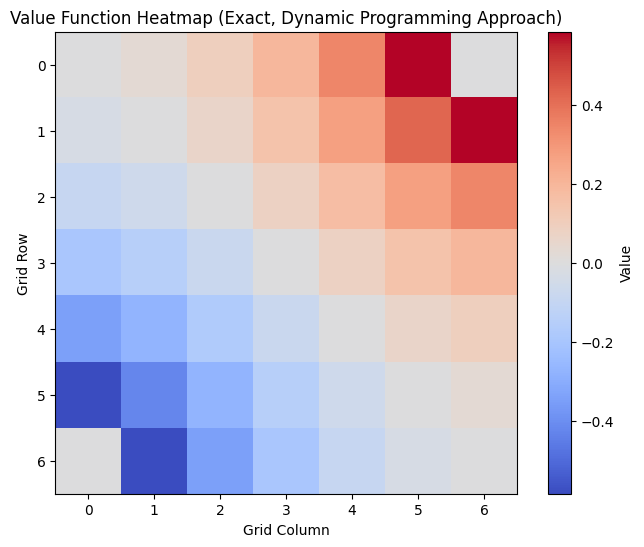

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the grid world environment
class GridWorld:
    def __init__(self, size=7):
        self.size = size
        self.grid = np.zeros((size, size))
        self.start_state = (size // 2, size // 2)
        self.terminal_states = {(0, size - 1): 1, (size - 1, 0): -1}
        self.state = self.start_state
        self.actions = [0, 1, 2, 3]  # up, right, down, left

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        row, col = self.state
        if action == 0:  # up
            row -= 1
        elif action == 1:  # right
            col += 1
        elif action == 2:  # down
            row += 1
        elif action == 3:  # left
            col -= 1

        if (row, col) in self.terminal_states:
            return (row, col), self.terminal_states[(row, col)], True
        elif row < 0 or row >= self.size or col < 0 or col >= self.size:
            return self.state, 0, False
        else:
            self.state = (row, col)
            return self.state, 0, False

# Dynamic Programming Approach for Exact Value Function
def exact_value_function_dp(env, gamma=0.99, theta=1e-10):
    size = env.size
    value_function = np.zeros((size, size))
    delta = float('inf')

    def is_terminal(state):
        return state in env.terminal_states

    def next_state(state, action):
        env.state = state
        next_state, _, _ = env.step(action)
        return next_state

    def get_reward(state):
        if state in env.terminal_states:
            return env.terminal_states[state]
        return 0

    while delta > theta:
        delta = 0
        new_value_function = np.copy(value_function)
        for i in range(size):
            for j in range(size):
                state = (i, j)
                if is_terminal(state):
                    continue
                v = 0
                for action in env.actions:
                    next_state_ = next_state(state, action)
                    reward = get_reward(next_state_)
                    v += (0.25 * (reward + gamma * value_function[next_state_]))
                new_value_function[state] = v
                delta = max(delta, np.abs(v - value_function[state]))
        value_function = new_value_function

    return value_function

env = GridWorld()

# Computing the exact value function using Dynamic Programming Approach
value_function_dp = exact_value_function_dp(env)

# Convert the value function to pandas DataFrame
value_function_dp_df = pd.DataFrame(value_function_dp)

# Display the value function DataFrame
print("Exact Value Function (Dynamic Programming Approach):")
print(value_function_dp_df)

# Plotting the heatmap of the exact value function (Dynamic Programming Approach)
plt.figure(figsize=(8, 6))
plt.imshow(value_function_dp, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Value')
plt.title('Value Function Heatmap (Exact, Dynamic Programming Approach)')
plt.xlabel('Grid Column')
plt.ylabel('Grid Row')
plt.show()


# Gradient Monte Carlo Question

          0         1         2         3         4         5         6
0  0.206781  0.055889  0.212982  0.144878  0.473190  0.666294  0.000000
1  0.044452  0.118089  0.173069  0.239512  0.359211  0.430618  0.400191
2 -0.030184 -0.001097  0.131223  0.289331  0.220474  0.268174  0.410508
3 -0.347869 -0.194077  0.146803  0.289970  0.316121  0.313997  0.393062
4 -0.422788 -0.279092  0.032782  0.117581  0.058866  0.033489  0.225425
5 -0.665724 -0.455777 -0.143994 -0.013033 -0.011122 -0.011221 -0.050446
6  0.000000 -0.563713 -0.245096 -0.135669  0.117941  0.127066  0.013286


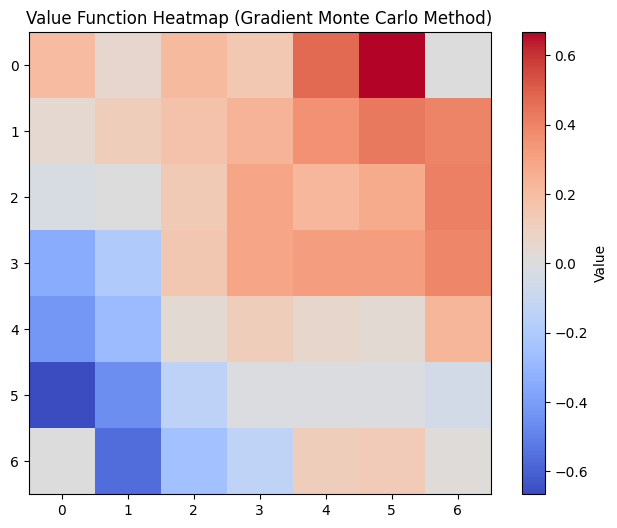

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the grid world environment
class GridWorld:
    def __init__(self, size=7):
        self.size = size
        self.grid = np.zeros((size, size))
        self.start_state = (size // 2, size // 2)
        self.terminal_states = {(0, size - 1): 1, (size - 1, 0): -1}
        self.state = self.start_state
        self.actions = [0, 1, 2, 3]  # up, right, down, left

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        row, col = self.state
        if action == 0:  # up
            row -= 1
        elif action == 1:  # right
            col += 1
        elif action == 2:  # down
            row += 1
        elif action == 3:  # left
            col -= 1

        if (row, col) in self.terminal_states:
            return (row, col), self.terminal_states[(row, col)], True
        elif row < 0 or row >= self.size or col < 0 or col >= self.size:
            return self.state, 0, False
        else:
            self.state = (row, col)
            return self.state, 0, False

# Gradient Monte Carlo method for estimating the value function
def gradient_monte_carlo(env, num_episodes, alpha=0.01):
    # Initialize weights for the value function approximation
    w = np.zeros(env.size * env.size)
    
    def feature_vector(state):
        vec = np.zeros(env.size * env.size)
        vec[state[0] * env.size + state[1]] = 1
        return vec
    
    def value(state):
        return np.dot(w, feature_vector(state))
    
    for _ in range(num_episodes):
        state = env.reset()
        episode = []
        
        while True:
            action = np.random.choice(env.actions)
            next_state, reward, done = env.step(action)
            episode.append((state, reward))
            state = next_state
            if done:
                break
        
        G = 0
        for state, reward in reversed(episode):
            G = reward + G
            w += alpha * (G - value(state)) * feature_vector(state)
    
    # Reshape the value function weights into a grid
    value_function = np.reshape(w, (env.size, env.size))
    return value_function

env = GridWorld()
num_episodes = 100000
value_function = gradient_monte_carlo(env, num_episodes)

# Convert value function to DataFrame
value_df = pd.DataFrame(value_function)
print(value_df)

# Plotting the heatmap of the value function
plt.figure(figsize=(8, 6))
plt.imshow(value_function, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Value')
plt.title('Value Function Heatmap (Gradient Monte Carlo Method)')
plt.show()



# Semi-gradient TD(0) method with an affine function approximation

          0         1         2         3         4         5         6
0  0.019319  0.058530  0.126487  0.234172  0.404632  0.640463  0.000000
1 -0.014682  0.017168  0.095053  0.186024  0.311554  0.464921  0.592670
2 -0.090252 -0.043025  0.008642  0.100421  0.207670  0.320983  0.367894
3 -0.211278 -0.147712 -0.082251  0.012727  0.105166  0.169792  0.225372
4 -0.368265 -0.284140 -0.191946 -0.081416  0.009086  0.074661  0.122272
5 -0.621301 -0.447600 -0.293203 -0.163077 -0.065275  0.000153  0.045192
6  0.000000 -0.616051 -0.380929 -0.222634 -0.104685 -0.029051  0.011298


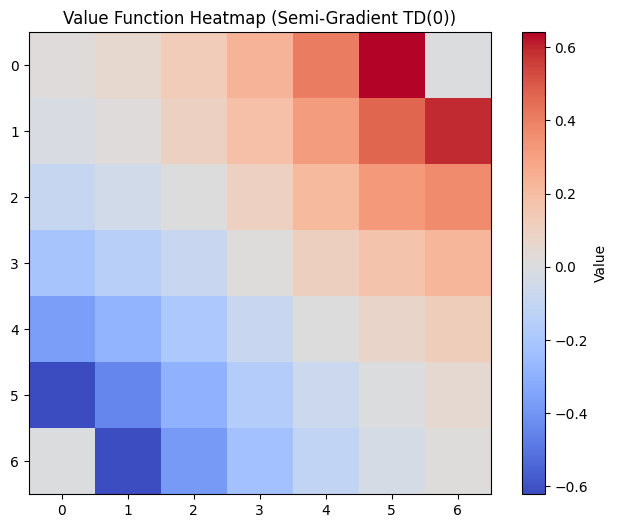

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid world environment
class GridWorld:
    def __init__(self, size=7):
        self.size = size
        self.grid = np.zeros((size, size))
        self.start_state = (size // 2, size // 2)
        self.terminal_states = {(0, size - 1): 1, (size - 1, 0): -1}
        self.state = self.start_state
        self.actions = [0, 1, 2, 3]  # up, right, down, left

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        row, col = self.state
        if action == 0:  # up
            row -= 1
        elif action == 1:  # right
            col += 1
        elif action == 2:  # down
            row += 1
        elif action == 3:  # left
            col -= 1

        if (row, col) in self.terminal_states:
            return (row, col), self.terminal_states[(row, col)], True
        elif row < 0 or row >= self.size or col < 0 or col >= self.size:
            return self.state, 0, False
        else:
            self.state = (row, col)
            return self.state, 0, False

# Semi-Gradient TD(0) method with affine function approximation
def semi_gradient_td_0(env, num_episodes, alpha=0.01):
    # Initialize weights for the value function approximation
    w = np.zeros(env.size * env.size)
    
    def feature_vector(state):
        vec = np.zeros(env.size * env.size)
        vec[state[0] * env.size + state[1]] = 1
        return vec
    
    def value(state):
        return np.dot(w, feature_vector(state))
    
    for _ in range(num_episodes):
        state = env.reset()
        
        while True:
            action = np.random.choice(env.actions)
            next_state, reward, done = env.step(action)
            
            td_target = reward + (0 if done else value(next_state))
            td_error = td_target - value(state)
            w += alpha * td_error * feature_vector(state)
            
            state = next_state
            if done:
                break
    
    # Reshape the value function weights into a grid
    value_function = np.reshape(w, (env.size, env.size))
    return value_function

env = GridWorld()
num_episodes = 100000

# Running the semi-gradient TD(0) method
value_function_td = semi_gradient_td_0(env, num_episodes)

# Convert value function to DataFrame
value_df_td = pd.DataFrame(value_function_td)
print(value_df_td)

# Plotting the heatmap of the value function
plt.figure(figsize=(8, 6))
plt.imshow(value_function_td, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Value')
plt.title('Value Function Heatmap (Semi-Gradient TD(0))')
# plt.xlabel('Grid Column')
# plt.ylabel('Grid Row')
plt.show()
